# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

# Problem Statement


In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.


# Objective

This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

# Research Question

Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

# Loading the Dataset

In [142]:
taxi_data = pd.read_csv('yellow_tripdata_2020-01.csv')

In [143]:
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


# Exploratory Data Analysis

We perform hypothesis between payment type and fare amount. so in this we pick only those columns which are related to both or can influence them.

In [144]:
taxi_data.shape

(6405008, 18)

In [145]:
taxi_data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [146]:
taxi_data['tpep_pickup_datetime'] = pd.to_datetime(taxi_data['tpep_pickup_datetime']) 
taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data['tpep_dropoff_datetime']) 

In [147]:
taxi_data.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [148]:
taxi_data['duration'] = taxi_data['tpep_dropoff_datetime'] - taxi_data['tpep_pickup_datetime']
taxi_data['duration'] = taxi_data['duration'].dt.total_seconds()/60

In [149]:
taxi_data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5,4.800000
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5,7.416667
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5,6.183333
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0,4.850000
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0,2.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0,31.000000
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0,76.000000
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0,27.833333
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0,22.650000


Extracting only that columns which are required hypothesis testing

In [150]:
taxi_data = taxi_data[['passenger_count','payment_type','fare_amount','trip_distance','duration']]

In [151]:
taxi_data.isnull().sum()

passenger_count    65441
payment_type       65441
fare_amount            0
trip_distance          0
duration               0
dtype: int64

In [152]:
(65441/len(taxi_data))*100

1.021716132126611

In [153]:
taxi_data.dropna(inplace = True)

In [154]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1.0,1.0,6.0,1.20,4.800000
1,1.0,1.0,7.0,1.20,7.416667
2,1.0,1.0,6.0,0.60,6.183333
3,1.0,1.0,5.5,0.80,4.850000
4,1.0,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1.0,1.0,11.0,2.10,14.233333
6339563,1.0,1.0,13.0,2.13,19.000000
6339564,1.0,1.0,12.5,2.55,16.283333
6339565,1.0,2.0,8.5,1.61,9.633333


In [155]:
taxi_data['passenger_count'] = taxi_data['passenger_count'].astype('int64')

In [156]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1.0,6.0,1.20,4.800000
1,1,1.0,7.0,1.20,7.416667
2,1,1.0,6.0,0.60,6.183333
3,1,1.0,5.5,0.80,4.850000
4,1,2.0,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1.0,11.0,2.10,14.233333
6339563,1,1.0,13.0,2.13,19.000000
6339564,1,1.0,12.5,2.55,16.283333
6339565,1,2.0,8.5,1.61,9.633333


In [157]:
taxi_data['payment_type'] = taxi_data['payment_type'].astype('int64')

In [158]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,1,6.0,1.20,4.800000
1,1,1,7.0,1.20,7.416667
2,1,1,6.0,0.60,6.183333
3,1,1,5.5,0.80,4.850000
4,1,2,3.5,0.00,2.300000
...,...,...,...,...,...
6339562,1,1,11.0,2.10,14.233333
6339563,1,1,13.0,2.13,19.000000
6339564,1,1,12.5,2.55,16.283333
6339565,1,2,8.5,1.61,9.633333


In [159]:
taxi_data[taxi_data.duplicated()]

,passenger_count,payment_type,fare_amount,trip_distance,duration
2056,1,2,7.0,0.00,0.000000
2441,1,1,52.0,0.00,0.200000
2446,2,1,9.5,1.70,13.066667
2465,1,1,4.0,0.40,3.083333
3344,1,1,6.0,1.20,5.350000
...,...,...,...,...,...
6339558,1,2,8.0,1.63,8.800000
6339559,1,1,8.5,1.81,8.016667
6339560,1,2,6.5,0.98,6.900000
6339562,1,1,11.0,2.10,14.233333


In [160]:
taxi_data.drop_duplicates(inplace = True)

In [161]:
taxi_data.shape

(3007861, 5)

Now check the contibution/distribution of column passenger_count & payment_type they both make in the data. As both column has categorical data, even though it is encoded. By doing this we check what type of variables, values it consist in it before performing analysis.

In [162]:
taxi_data['passenger_count'].value_counts(normalize = True)

passenger_count
1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: proportion, dtype: float64

value_counts = Give frequency of value counts of the categorical data .....,
normalize = This parameter is used to give percentage of the contribution/distribution.

In [163]:
taxi_data['payment_type'].value_counts(normalize = True)

payment_type
1    6.782670e-01
2    3.075731e-01
3    8.721480e-03
4    5.438084e-03
5    3.324622e-07
Name: proportion, dtype: float64

As we do not need more than 2 payment type and also no need more than 6 passengers at a time during cab booking.

In [164]:
taxi_data = taxi_data[(taxi_data['passenger_count']>0)&(taxi_data['passenger_count']<6)]
taxi_data = taxi_data[taxi_data['payment_type']<3]

In [165]:
taxi_data.shape

(2780283, 5)

In [166]:
taxi_data['payment_type'].replace([1,2],['UPI','Cash'],inplace = True)

In [167]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,UPI,6.0,1.20,4.800000
1,1,UPI,7.0,1.20,7.416667
2,1,UPI,6.0,0.60,6.183333
3,1,UPI,5.5,0.80,4.850000
4,1,Cash,3.5,0.00,2.300000
...,...,...,...,...,...
6339555,3,UPI,10.0,2.09,14.800000
6339561,1,UPI,17.5,4.11,21.500000
6339563,1,UPI,13.0,2.13,19.000000
6339564,1,UPI,12.5,2.55,16.283333


Now we check out numerical data after filtering out categorical data.. For numerical data we use describe() function

In [168]:
taxi_data.describe()

,passenger_count,fare_amount,trip_distance,duration
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,1.733386e+00,1.780567e+01,4.536729e+00,2.415478e+01
std,1.176652e+00,1.506997e+01,4.895890e+00,9.260031e+01
min,1.000000e+00,-5.000000e+02,-2.218000e+01,-2.770367e+03
25%,1.000000e+00,9.000000e+00,1.500000e+00,9.883333e+00
50%,1.000000e+00,1.300000e+01,2.730000e+00,1.573333e+01
75%,2.000000e+00,2.100000e+01,5.470000e+00,2.336667e+01
max,5.000000e+00,4.265000e+03,2.628800e+02,8.525117e+03


In [169]:
taxi_data = taxi_data[taxi_data['fare_amount']>0]
taxi_data = taxi_data[taxi_data['trip_distance']>0]
taxi_data = taxi_data[taxi_data['duration']>0]


In [170]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,UPI,6.0,1.20,4.800000
1,1,UPI,7.0,1.20,7.416667
2,1,UPI,6.0,0.60,6.183333
3,1,UPI,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,UPI,10.5,2.40,12.383333
6339555,3,UPI,10.0,2.09,14.800000
6339561,1,UPI,17.5,4.11,21.500000
6339563,1,UPI,13.0,2.13,19.000000


Now checking whether outliers present in data or not (with the help of one of the function 'plt.hist'), whether it is in significant amount or we can ignore it. If it is significant no then we have to remove it..

(array([2.748913e+06, 1.600000e+01, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e-02, 4.265090e+02, 8.530080e+02, 1.279507e+03,
        1.706006e+03, 2.132505e+03, 2.559004e+03, 2.985503e+03,
        3.412002e+03, 3.838501e+03, 4.265000e+03]),
 <BarContainer object of 10 artists>)

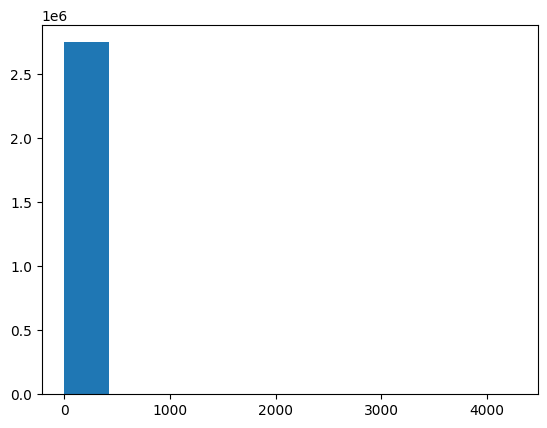

In [171]:
plt.hist(taxi_data['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20e1884d940>,
 'caps': [<matplotlib.lines.Line2D at 0x20ec8874a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x20eaaf16ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ec8876ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ec8876ea0>],
 'means': []}

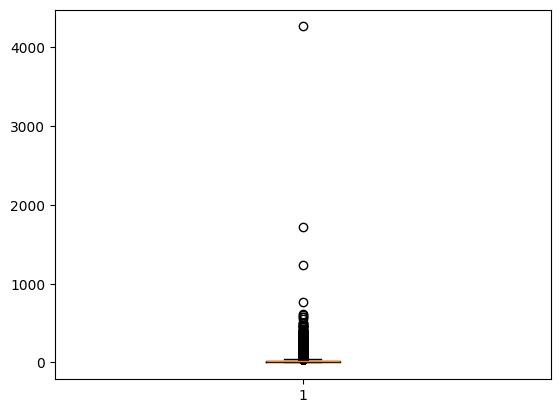

In [173]:
 plt.boxplot(taxi_data['fare_amount'])

To remove outlier either we use z-score method or inter-quartile range.. In thos we use inter-quartile method bcz data doesnot seems to be normally distributed for z-score method to be used..


In [177]:
for col in ['fare_amount','trip_distance','duration']:
    q1 = taxi_data[col].quantile(0.25)
    q3 = taxi_data[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1-1.5*IQR
    upper_bound = q3+1.5*IQR

    taxi_data = taxi_data[(taxi_data[col]>=lower_bound) & (taxi_data[col]<=upper_bound)]


In [178]:
taxi_data

,passenger_count,payment_type,fare_amount,trip_distance,duration
0,1,UPI,6.0,1.20,4.800000
1,1,UPI,7.0,1.20,7.416667
2,1,UPI,6.0,0.60,6.183333
3,1,UPI,5.5,0.80,4.850000
5,1,Cash,2.5,0.03,0.883333
...,...,...,...,...,...
6339550,4,UPI,10.5,2.40,12.383333
6339555,3,UPI,10.0,2.09,14.800000
6339561,1,UPI,17.5,4.11,21.500000
6339563,1,UPI,13.0,2.13,19.000000


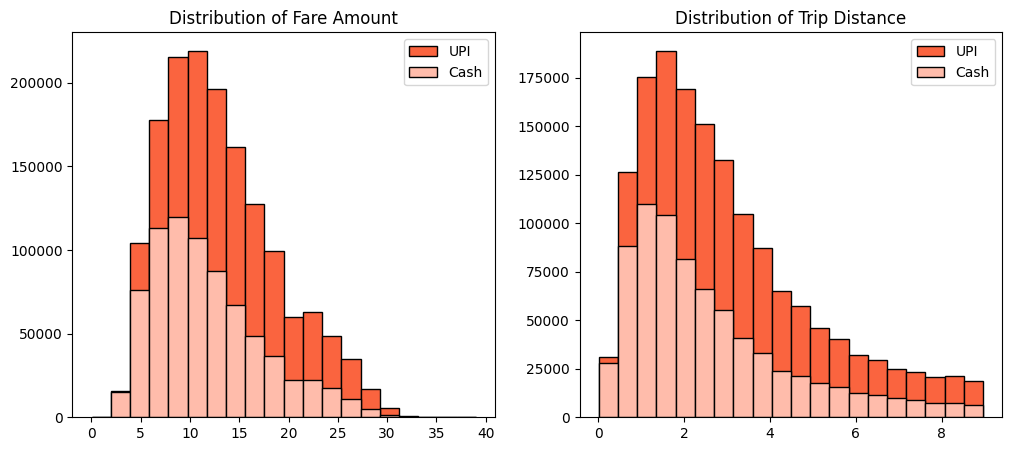

In [179]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(taxi_data[taxi_data['payment_type']=='UPI']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'UPI')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['fare_amount'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(taxi_data[taxi_data['payment_type']=='UPI']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FA643F', label = 'UPI')
plt.hist(taxi_data[taxi_data['payment_type']=='Cash']['trip_distance'], histtype= 'barstacked', bins = 20, edgecolor = 'k', color = '#FFBCAB', label = 'Cash')
plt.legend()
plt.show()


Now checking mean, std of both parameter so we can compare it..


In [180]:
taxi_data.groupby('payment_type').agg({'fare_amount':['mean','std'], 'trip_distance':['mean','std']})

fare_amount           trip_distance         
                    mean       std          mean      std
payment_type                                             
Cash           11.758005  5.613038      2.602207  1.91372
UPI            13.112493  5.849281      2.992237  1.99274

Now we check in what percent customer pay through upi and also from cash. For it we use pie chart to depict it.

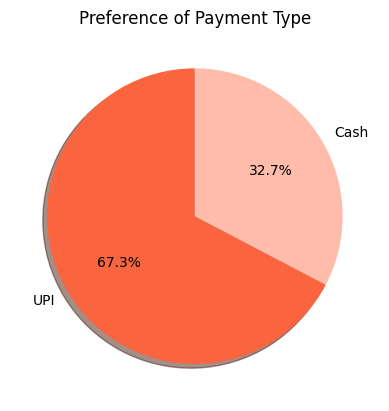

In [181]:
plt.title('Preference of Payment Type')
plt.pie(taxi_data['payment_type'].value_counts(normalize = True), labels = taxi_data['payment_type'].value_counts().index,
        startangle =90, shadow = True, autopct ='%1.1f%%', colors = ['#FA643F','#FFBCAB'])
plt.show()

Now check payment type(upi or cash) distribution on the basis of passenger count. We have max of 5 passengers, to depict this we 
use Stacked bar chart..

# Passenger Count Analysis

1. Among UPI payments, rides with a single passenger (passenger_count = 1) comprise the largest proportion, constituting 40.08% of all UPI transactions.
2. Similarly, cash payments are predominantly associated with single-passenger rides, making up 20.04% of all cash transactions.
3. There is a noticeable decrease in the percentage of transactions as the passenger count increases, suggesting that larger groups are less likely to use taxis or may opt for alternative payment methods.
4. These insights emphasize the importance of considering both payment method and passenger count when analyzing transaction data, as they provide valuable insights into customer behavior and preferences.

In [182]:
taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

passenger_count
payment_type passenger_count                 
Cash         1                         460550
             2                         155472
             3                          54506
             4                          32715
             5                          47626
UPI          1                         909245
             2                         327661
             3                         122412
             4                          63676
             5                         124045

In [183]:
passenger_count = taxi_data.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns = {'passenger_count':'count'}, inplace = True)
passenger_count.reset_index(inplace = True)

In [184]:
passenger_count['perc'] = passenger_count['count']/passenger_count['count'].sum()*100

In [193]:
passenger_count

,payment_type,passenger_count,count,perc
0,Cash,1,460550,20.042143
1,Cash,2,155472,6.765806
2,Cash,3,54506,2.371984
3,Cash,4,32715,1.423686
4,Cash,5,47626,2.072581
5,UPI,1,909245,39.568381
6,UPI,2,327661,14.259100
7,UPI,3,122412,5.327106
8,UPI,4,63676,2.771042
9,UPI,5,124045,5.398171


Now we have to plot this percentage value in a stacked bar chart. for this we create a custom dataset, to transform these values and then put it in the chart. At first we create an empty dataframe to store this data. If we directly make chart using that value without use of dataframe then we are not able to generate stacked bar chart, we could only create normal bar chart. Thats why we create dataframe. 

In [194]:
df = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])
df['payment_type'] = ['Cash', 'UPI']
df.iloc[0,1:] = passenger_count.iloc[0:5,-1]
df.iloc[1,1:] = passenger_count.iloc[5:,-1]
df

,payment_type,1,2,3,4,5
0,Cash,20.042143,6.765806,2.371984,1.423686,2.072581
1,UPI,39.568381,14.2591,5.327106,2.771042,5.398171


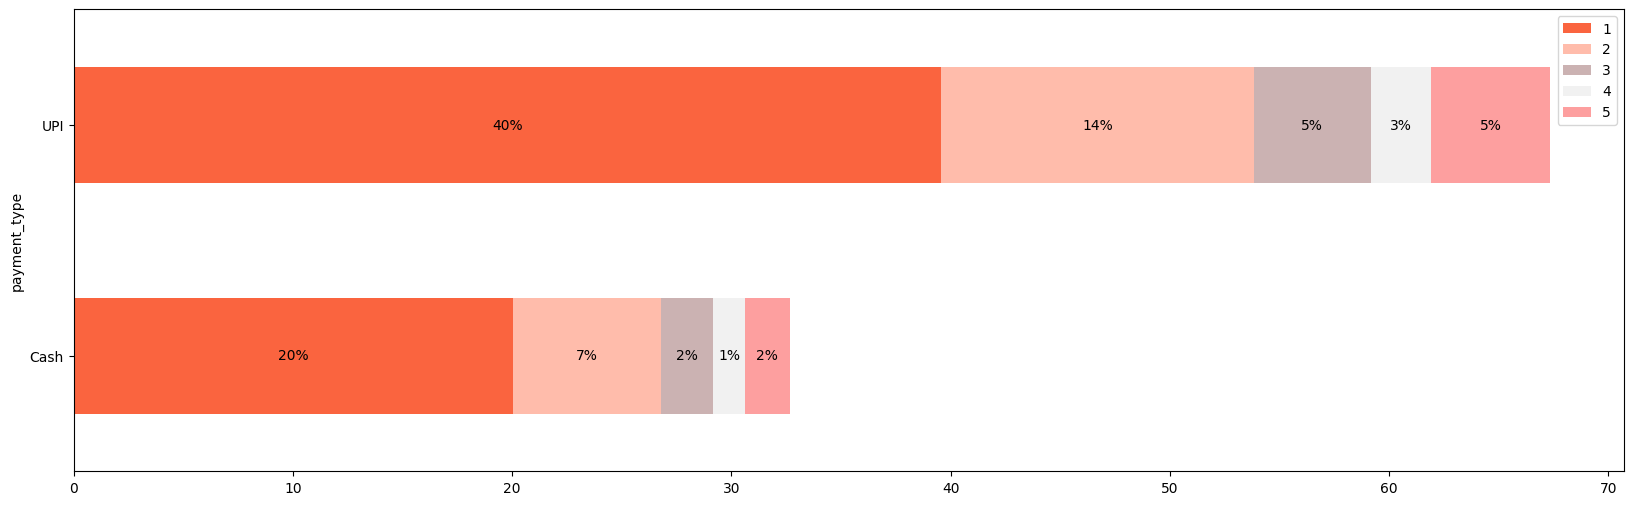

In [187]:
fig, ax = plt.subplots(figsize=(20, 6))
df.plot(x ='payment_type', kind = 'barh', stacked = True, color = ['#FA643F','#FFBCAB','#CBB2B2','#F1F1F1','#Fd9F9F'], ax=ax)

# Add Pecentage Text

for p in ax.patches: 
    width= p.get_width() 
    height=p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

# Null Hypothesis: There is no difference in avg fare b/w customers who use upi and customers who use cash.
# Alternate Hypothesis: There is difference in avg fare b/w customers who use upi and customers who use cash.

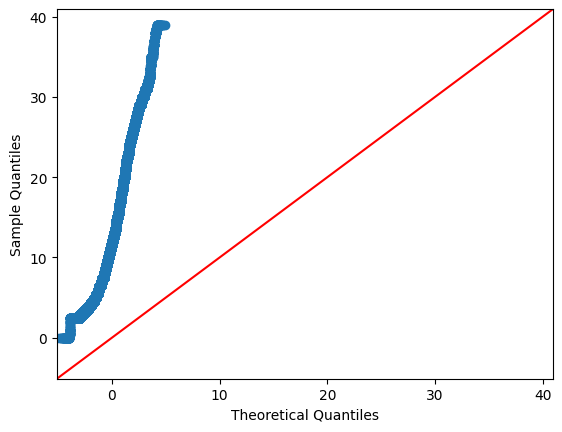

In [189]:
sm.qqplot(taxi_data['fare_amount'], line = '45')
plt.show()

In [191]:
UPI_sample = taxi_data[taxi_data['payment_type']=='UPI']['fare_amount']
Cash_sample = taxi_data[taxi_data['payment_type']=='Cash']['fare_amount']

In [192]:
t_stats, p_value = st.ttest_ind(a = UPI_sample, b = Cash_sample, equal_var = False)
print('T statistic:', t_stats, 'p-value:',p_value)

T statistic: 169.2111527245052 p-value: 0.0


#With a T-statistic of 169.2 and a P value less than 0.05, we reject null hypothesis, suggesting that there is indeed a significant difference in avg fare b/w the two payment methods.(we take significance value=0.05, means 5%)